# PID Parameter Tuning Using Fuzzy

![PID_Fuzzy](PID_Fuzzy.png)
Proses penalaan nilai Kc, τI dan τD pada
pengendali PID menggunakan sistem fuzzy


FUZZY RULE

![fuzzy1.png](fuzzy1.png)


In [4]:
# Import NumPy and scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

##Describe Fuzzy System

First create fuzzy membership functions which represent *degree of truth* related to a continuous variable variable.

In [5]:
# Generate universe functions
ERROR       = np.arange(0, 5, 0.01)
DELTA_ERROR = np.arange(0, 5, 0.01)

Kc   = np.arange(-0.2, 1.0, 0.01)
tauI = np.arange(0.01, 5.0, 0.01)
tauD = np.arange(0.0, 1.0, 0.01)

# Membership functions for ERROR
SE = fuzz.gaussmf(ERROR, 0.01, 0.8495)   
ME = fuzz.gaussmf(ERROR, 2.5, 0.8495)  
BE = fuzz.gaussmf(ERROR, 5, 0.8495)  

# Membership functions for DELTA_EROR
SDE = fuzz.gaussmf(DELTA_ERROR, 0.01, 0.8495) 
MDE = fuzz.gaussmf(DELTA_ERROR, 2.5, 0.8495) 
BDE = fuzz.gaussmf(DELTA_ERROR, 5, 0.8495) 

# Membership functions for OUTPUT_Kc, OUTPUT_tauI, OUTPUT_tauD 
S1 = fuzz.gaussmf(Kc, -0.2, 0.2039)  
M1 = fuzz.gaussmf(Kc, 0.4, 0.2039)  
B1 = fuzz.gaussmf(Kc, 1, 0.2039)  

S2 = fuzz.gaussmf(tauI, 0.01, 0.8476)  
M2 = fuzz.gaussmf(tauI, 2.505, 0.8476)  
B2 = fuzz.gaussmf(tauI, 5, 0.8476)  

S3 = fuzz.gaussmf(tauD, 6.939e-18, 0.1699)  
M3 = fuzz.gaussmf(tauD, 0.5, 0.1699)  
B3 = fuzz.gaussmf(tauD, 1, 0.1699)  


##Visualize Fuzzy System

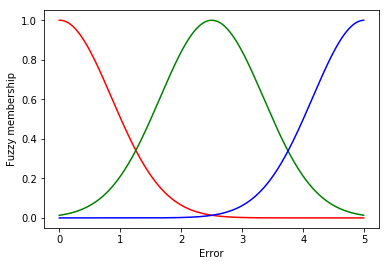

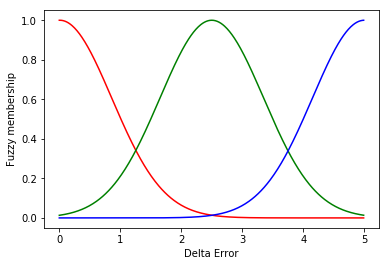

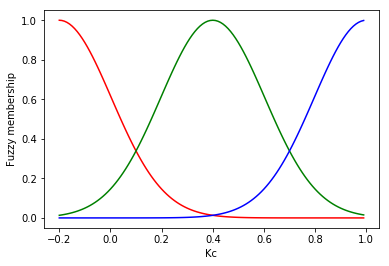

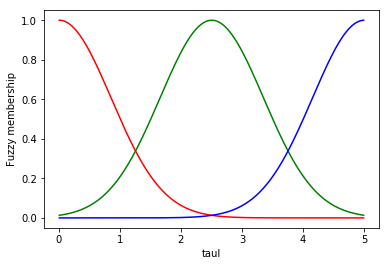

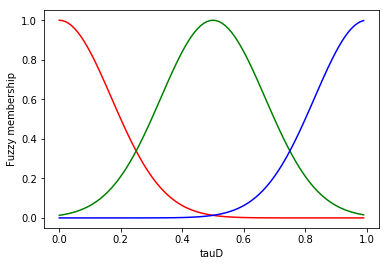

In [6]:
# Visualize membership functions for ERROR
fig, ax = plt.subplots()

ax.plot(ERROR, SE, 'r', ERROR, ME, 'g', ERROR, BE, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Error')
ax.set_ylim(-0.05, 1.05);

# Visualize membership functions for DELTA_ERROR
fig, ax = plt.subplots()

ax.plot(DELTA_ERROR, SDE, 'r', DELTA_ERROR, MDE, 'g', DELTA_ERROR, BDE, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Delta Error')
ax.set_ylim(-0.05, 1.05);

# Visualize membership functions for OUTPUT_Kc
fig, ax = plt.subplots()

ax.plot(Kc, S1, 'r', Kc, M1, 'g', Kc, B1, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Kc')
ax.set_ylim(-0.05, 1.05);

# Visualize membership functions for OUTPUT_tauI
fig, ax = plt.subplots()

ax.plot(tauI, S2, 'r', tauI, M2, 'g', tauI, B2, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('tauI')
ax.set_ylim(-0.05, 1.05);

# Visualize membership functions for OUTPUT_tauD
fig, ax = plt.subplots()

ax.plot(tauD, S3, 'r', tauD, M3, 'g', tauD, B3, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('tauD')
ax.set_ylim(-0.05, 1.05);




In [7]:
def ERROR_category(ERROR_in = 5):
    ERROR_cat_SMALL   = fuzz.interp_membership(ERROR, SE, ERROR_in) 
    ERROR_cat_MEDIUM  = fuzz.interp_membership(ERROR, ME, ERROR_in) 
    ERROR_cat_BIG     = fuzz.interp_membership(ERROR, BE, ERROR_in) 
    return dict(SMALL_ERROR = ERROR_cat_SMALL, MEDIUM_ERROR = ERROR_cat_MEDIUM, BIG_ERROR = ERROR_cat_BIG)

def DELTA_ERROR_category(DELTA_ERROR_in = 5):
    DELTA_ERROR_cat_SMALL   = fuzz.interp_membership(DELTA_ERROR, SDE, DELTA_ERROR_in) 
    DELTA_ERROR_cat_MEDIUM  = fuzz.interp_membership(DELTA_ERROR, MDE, DELTA_ERROR_in) 
    DELTA_ERROR_cat_BIG     = fuzz.interp_membership(DELTA_ERROR, BDE, DELTA_ERROR_in) 
    return dict(SMALL_DELTA_ERROR = DELTA_ERROR_cat_SMALL, MEDIUM_DELTA_ERROR = DELTA_ERROR_cat_MEDIUM, BIG_DELTA_ERROR = DELTA_ERROR_cat_BIG)


#Exaple input variables 
ERROR_in = ERROR_category(5)
DELTA_ERROR_in = DELTA_ERROR_category(1)
print ("For ERROR"), ERROR_in
print ("For DELTA_ERROR"), DELTA_ERROR_in 




For ERROR
For DELTA_ERROR


(None,
 {'SMALL_DELTA_ERROR': 0.5070890927840352,
  'MEDIUM_DELTA_ERROR': 0.21036168549699913,
  'BIG_DELTA_ERROR': 1.5329943863625023e-05})

In [8]:
# RULE for OUTPUT_Kc
rule1 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule2 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule3 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])
rule4 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule5 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule6 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])
rule7 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule8 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule9 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])

# RULE for tau_I
rule10 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule11 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule12 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])
rule13 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule14 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule15 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])
rule16 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule17 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule18 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])

# RULE for tau_D
rule19 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule20 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule21 = np.fmax(ERROR_in['SMALL_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])
rule22 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule23 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule24 = np.fmax(ERROR_in['MEDIUM_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])
rule25 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['SMALL_DELTA_ERROR'])
rule26 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['MEDIUM_DELTA_ERROR'])
rule27 = np.fmax(ERROR_in['BIG_ERROR'], DELTA_ERROR_in['BIG_DELTA_ERROR'])


In [9]:
# IMPLIKASI for Kc
imp1 = np.fmax(rule1, S1)
imp2 = np.fmax(rule2, S1)
imp3 = np.fmax(rule3, S1)
imp4 = np.fmax(rule4, M1)
imp5 = np.fmax(rule5, M1)
imp6 = np.fmax(rule6, M1)
imp7 = np.fmax(rule7, B1)
imp8 = np.fmax(rule7, B1)
imp9 = np.fmax(rule7, B1)

# IMPLIKASI for tauI
imp10 = np.fmax(rule10, S2)
imp11 = np.fmax(rule11, S2)
imp12 = np.fmax(rule12, S2)
imp13 = np.fmax(rule13, M2)
imp14 = np.fmax(rule14, M2)
imp15 = np.fmax(rule15, M2)
imp16 = np.fmax(rule16, B2)
imp17 = np.fmax(rule17, B2)
imp18 = np.fmax(rule18, B2)

# IMPLIKASI for tauD
imp19 = np.fmax(rule19, S3)
imp20 = np.fmax(rule20, S3)
imp21 = np.fmax(rule21, S3)
imp22 = np.fmax(rule22, M3)
imp23 = np.fmax(rule23, M3)
imp24 = np.fmax(rule24, M3)
imp25 = np.fmax(rule25, B3)
imp26 = np.fmax(rule26, B3)
imp27 = np.fmax(rule27, B3)



# Defuzzification

In [10]:
# Aggregate all output - min
aggregate_membership1 = np.fmax(imp1, np.fmax(imp2, np.fmax(imp3, np.fmax(imp4, np.fmax(imp5, np.fmax(imp6, np.fmax(imp7, np.fmax(imp8,imp9))))))))
aggregate_membership2 = np.fmax(imp10, np.fmax(imp11, np.fmax(imp12, np.fmax(imp13, np.fmax(imp14, np.fmax(imp15, np.fmax(imp16, np.fmax(imp17,imp18))))))))
aggregate_membership3 = np.fmax(imp19, np.fmax(imp20, np.fmax(imp21, np.fmax(imp22, np.fmax(imp23, np.fmax(imp24, np.fmax(imp25, np.fmax(imp26,imp27))))))))


In [11]:
# Defuzzification
result_Kc   = fuzz.defuzz(Kc, aggregate_membership1 , 'centroid')
result_tauI = fuzz.defuzz(tauI, aggregate_membership2 , 'centroid')
result_tauD = fuzz.defuzz(tauD, aggregate_membership3 , 'centroid')
print (result_Kc)
print (result_tauI)
print (result_tauD)


0.39331459212203296
2.4983242909359484
0.49331226163799125


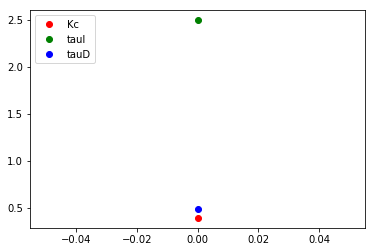

In [12]:
# Visualize 
plt.plot(result_Kc, 'ro', label='Kc')
plt.plot(result_tauI, 'go', label='tauI')
plt.plot(result_tauD, 'bo', label='tauD')

#plt.xlabel('Kc, tauI, tauD');
#plt.legend((result_Kc, result_tauI, result_tauD), ('Kc', 'tauI', 'tauD'))

plt.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

In [14]:
n = 100 # time points to plot
tf = 50.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = wg.FloatSlider(value=result_Kc,min=-0.2,max=1.0,step=0.05)
tauI_slide = wg.FloatSlider(value=result_tauI,min=0.01,max=5.0,step=0.1)
tauD_slide = wg.FloatSlider(value=result_tauD,min=0.0,max=1.0,step=0.1)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)

interactive(children=(FloatSlider(value=0.39331459212203296, description='Kc', max=1.0, min=-0.2, step=0.05), …

<function __main__.pidPlot(Kc, tauI, tauD)>